In [1]:
import numpy as np
import scipy.stats
import scipy.ndimage.filters
import matplotlib.pyplot as plt
from GLMHMM import GLMHMMEstimator
from scipy.io import loadmat

In [2]:
num_samples = 5
num_states = 2
num_emissions = 2
num_feedbacks = 3
num_filter_bins = 30
num_steps = 1
filter_offset = 1

In [3]:
tau = 4
total_time = 10000
noiseSD = 0.1
stim_scale = 1
num_real_states = 2

In [4]:
stim = []
states = []
output_stim = []
output_trace = []

In [5]:
for ns in range(0, num_samples):
    output = np.zeros((num_real_states, total_time))
    
    stim_temp = np.zeros((num_filter_bins, total_time + num_filter_bins - 1, num_feedbacks))
    stim_temp[0, :, :] = scipy.ndimage.filters.gaussian_filter(np.random.randn(total_time + num_filter_bins - 1, num_feedbacks), stim_scale)

    for i in range(1, num_filter_bins):
        stim_temp[i, 0:total_time, :] = stim_temp[0, i:(total_time + i), :]
    
    stim.append(stim_temp[:, 0:total_time, :] + np.random.randn(num_filter_bins, total_time, num_feedbacks) * noiseSD)
    filt = scipy.stats.gamma.pdf(np.linspace(0, num_filter_bins), a = tau)[0:num_filter_bins]

    p1 = np.exp(np.matmul(stim[ns][:, :, 0].T, filt.T) + np.matmul(stim[ns][:, :, 1].T, -filt.T))
    output[0, :] = p1 / (1 + p1) > 0.5
    p2 = np.exp(np.matmul(stim[ns][:, :, 0].T, -filt.T) + np.matmul(stim[ns][:, :, 1].T, filt.T))
    output[1, :] = p2 / (1 + p2) > 0.5

    p3 = np.exp(np.matmul(stim[ns][:, :, 2].T, filt.T))
    states.append(p3 / (1 + p3) > 0.5)

    output_trace.append(np.zeros(total_time))
    for ss in range(0, num_real_states):
        output_trace[ns][states[ns] == ss] = output[ss][states[ns] == ss]

    final_stim = np.append(stim[ns][:, :, 0], stim[ns][:, :, 1], axis = 0)
    final_stim = np.append(final_stim, stim[ns][:, :, 2], axis = 0)
    final_stim = np.append(final_stim, np.ones((1, total_time)), axis = 0)
    output_stim.append(final_stim)

In [6]:
estimator = GLMHMMEstimator(num_samples = num_samples, num_states = num_states, num_emissions = num_emissions, num_feedbacks = num_feedbacks, num_filter_bins = num_filter_bins, num_steps = num_steps, filter_offset = filter_offset)
output, parameters_dict = estimator.fit(output_stim, output_trace, [])

Fitting iteration:   1
Fitting categorical emission filters
Solving the Minimization Problem
    Iter:    |     F       |    ||g||    | |x - y|/|x| |   F Evals   |    alpha    
-----------------------------------------------------------------------------------
  1.000e+00  |  2.437e-01  |  2.063e-02  |  8.608e-02  |  2.000e+00  |  1.000e+01  
  2.000e+00  |  2.373e-01  |  1.328e-02  |  9.232e-02  |  1.000e+00  |  1.000e+00  
  3.000e+00  |  2.328e-01  |  1.507e-02  |  1.055e-01  |  1.000e+00  |  1.000e+00  
  4.000e+00  |  2.260e-01  |  1.369e-02  |  2.811e-01  |  1.000e+00  |  1.000e+00  
  5.000e+00  |  2.251e-01  |  9.958e-03  |  6.939e-02  |  2.000e+00  |  4.827e-01  
  6.000e+00  |  2.243e-01  |  1.962e-03  |  4.713e-02  |  1.000e+00  |  1.000e+00  
  7.000e+00  |  2.242e-01  |  1.155e-03  |  1.879e-02  |  1.000e+00  |  1.000e+00  
  8.000e+00  |  2.242e-01  |  1.228e-03  |  1.243e-02  |  1.000e+00  |  1.000e+00  
  9.000e+00  |  2.241e-01  |  1.766e-03  |  7.188e-02  |  1.000e+00

  1.600e+01  |  1.856e-01  |  1.872e-04  |  2.918e-03  |  1.000e+00  |  1.000e+00  
  1.700e+01  |  1.856e-01  |  1.818e-04  |  3.158e-03  |  1.000e+00  |  1.000e+00  
  1.800e+01  |  1.856e-01  |  1.947e-04  |  6.281e-03  |  1.000e+00  |  1.000e+00  
  1.900e+01  |  1.856e-01  |  2.465e-04  |  1.142e-02  |  1.000e+00  |  1.000e+00  
  2.000e+01  |  1.856e-01  |  1.671e-04  |  6.648e-03  |  2.000e+00  |  4.461e-01  
  2.100e+01  |  1.856e-01  |  7.602e-05  |  2.667e-03  |  1.000e+00  |  1.000e+00  
  2.200e+01  |  1.856e-01  |  6.633e-05  |  1.697e-03  |  1.000e+00  |  1.000e+00  
  2.300e+01  |  1.856e-01  |  6.492e-05  |  1.789e-03  |  1.000e+00  |  1.000e+00  
  2.400e+01  |  1.856e-01  |  1.035e-04  |  3.026e-03  |  1.000e+00  |  1.000e+00  
  2.500e+01  |  1.856e-01  |  2.938e-05  |  5.952e-04  |  1.000e+00  |  1.000e+00  
  2.600e+01  |  1.856e-01  |  2.196e-05  |  3.142e-04  |  1.000e+00  |  1.000e+00  
  2.700e+01  |  1.856e-01  |  2.135e-05  |  6.107e-04  |  1.000e+00  |  1.00

  4.000e+00  |  3.213e-01  |  5.474e-03  |  5.564e-02  |  1.000e+00  |  1.000e+00  
  5.000e+00  |  3.212e-01  |  2.339e-03  |  2.083e-02  |  1.000e+00  |  1.000e+00  
  6.000e+00  |  3.211e-01  |  1.854e-03  |  2.330e-02  |  1.000e+00  |  1.000e+00  
  7.000e+00  |  3.208e-01  |  3.575e-03  |  1.117e-01  |  1.000e+00  |  1.000e+00  
  8.000e+00  |  3.206e-01  |  3.528e-03  |  1.295e-01  |  1.000e+00  |  1.000e+00  
  9.000e+00  |  3.205e-01  |  3.405e-03  |  5.746e-02  |  2.000e+00  |  3.050e-01  
  1.000e+01  |  3.204e-01  |  1.516e-03  |  8.878e-02  |  1.000e+00  |  1.000e+00  
  1.100e+01  |  3.204e-01  |  4.506e-04  |  1.247e-02  |  1.000e+00  |  1.000e+00  
  1.200e+01  |  3.204e-01  |  1.717e-04  |  5.612e-03  |  1.000e+00  |  1.000e+00  
  1.300e+01  |  3.204e-01  |  1.693e-04  |  1.985e-03  |  1.000e+00  |  1.000e+00  
  1.400e+01  |  3.204e-01  |  2.429e-04  |  4.742e-03  |  1.000e+00  |  1.000e+00  
  1.500e+01  |  3.204e-01  |  2.725e-04  |  8.373e-03  |  1.000e+00  |  1.00

  2.000e+00  |  1.706e-01  |  5.736e-03  |  1.777e-01  |  1.000e+00  |  1.000e+00  
  3.000e+00  |  1.703e-01  |  3.267e-03  |  4.017e-02  |  2.000e+00  |  4.966e-01  
  4.000e+00  |  1.701e-01  |  2.754e-03  |  1.663e-02  |  1.000e+00  |  1.000e+00  
  5.000e+00  |  1.696e-01  |  2.493e-03  |  1.305e-01  |  1.000e+00  |  1.000e+00  
  6.000e+00  |  1.693e-01  |  4.529e-03  |  1.248e-01  |  1.000e+00  |  1.000e+00  
  7.000e+00  |  1.690e-01  |  2.626e-03  |  5.307e-02  |  1.000e+00  |  1.000e+00  
  8.000e+00  |  1.687e-01  |  1.199e-03  |  1.019e-01  |  1.000e+00  |  1.000e+00  
  9.000e+00  |  1.687e-01  |  8.179e-04  |  3.625e-02  |  1.000e+00  |  1.000e+00  
  1.000e+01  |  1.687e-01  |  6.175e-04  |  1.024e-02  |  2.000e+00  |  3.611e-01  
  1.100e+01  |  1.687e-01  |  1.882e-04  |  7.192e-03  |  1.000e+00  |  1.000e+00  
  1.200e+01  |  1.687e-01  |  1.583e-04  |  2.712e-03  |  1.000e+00  |  1.000e+00  
  1.300e+01  |  1.687e-01  |  1.690e-04  |  7.340e-03  |  1.000e+00  |  1.00

    Iter:    |     F       |    ||g||    | |x - y|/|x| |   F Evals   |    alpha    
-----------------------------------------------------------------------------------
  1.000e+00  |  2.028e-01  |  7.652e-03  |  6.297e-02  |  2.000e+00  |  1.000e+01  
  2.000e+00  |  2.020e-01  |  4.570e-03  |  4.570e-02  |  1.000e+00  |  1.000e+00  
  3.000e+00  |  2.015e-01  |  3.270e-03  |  5.242e-02  |  1.000e+00  |  1.000e+00  
  4.000e+00  |  2.012e-01  |  1.569e-03  |  5.937e-02  |  1.000e+00  |  1.000e+00  
  5.000e+00  |  2.011e-01  |  1.928e-03  |  2.587e-02  |  1.000e+00  |  1.000e+00  
  6.000e+00  |  2.011e-01  |  6.605e-04  |  8.093e-03  |  1.000e+00  |  1.000e+00  
  7.000e+00  |  2.011e-01  |  5.353e-04  |  5.130e-03  |  1.000e+00  |  1.000e+00  
  8.000e+00  |  2.011e-01  |  8.714e-04  |  2.965e-02  |  1.000e+00  |  1.000e+00  
  9.000e+00  |  2.010e-01  |  9.058e-04  |  3.555e-02  |  1.000e+00  |  1.000e+00  
  1.000e+01  |  2.010e-01  |  8.406e-04  |  2.406e-02  |  2.000e+00  |  5.11

  2.700e+01  |  3.501e-01  |  2.145e-05  |  4.969e-04  |  1.000e+00  |  1.000e+00  
==================================== Summary ======================================
Iterations: 27
Function Evaluations: 30
F: 0.3501030206680298
||g||: 2.1446447135531344e-05
Fitting state transition filters
Solving the Minimization Problem
    Iter:    |     F       |    ||g||    | |x - y|/|x| |   F Evals   |    alpha    
-----------------------------------------------------------------------------------
  1.000e+00  |  1.793e-01  |  9.099e-03  |  4.980e-02  |  2.000e+00  |  1.000e+01  
  2.000e+00  |  1.783e-01  |  5.093e-03  |  3.896e-02  |  1.000e+00  |  1.000e+00  
  3.000e+00  |  1.779e-01  |  3.416e-03  |  3.147e-02  |  1.000e+00  |  1.000e+00  
  4.000e+00  |  1.776e-01  |  1.495e-03  |  3.426e-02  |  1.000e+00  |  1.000e+00  
  5.000e+00  |  1.776e-01  |  1.327e-03  |  1.273e-02  |  1.000e+00  |  1.000e+00  
  6.000e+00  |  1.776e-01  |  5.312e-04  |  3.216e-03  |  1.000e+00  |  1.000e+00  
  

  2.200e+01  |  8.563e-02  |  4.111e-05  |  7.029e-04  |  1.000e+00  |  1.000e+00  
  2.300e+01  |  8.563e-02  |  2.864e-05  |  4.520e-04  |  1.000e+00  |  1.000e+00  
  2.400e+01  |  8.563e-02  |  3.296e-05  |  7.269e-04  |  1.000e+00  |  1.000e+00  
  2.500e+01  |  8.563e-02  |  3.037e-05  |  1.045e-03  |  1.000e+00  |  1.000e+00  
  2.600e+01  |  8.563e-02  |  7.337e-05  |  1.669e-03  |  1.000e+00  |  1.000e+00  
  2.700e+01  |  8.563e-02  |  1.422e-05  |  4.204e-04  |  1.000e+00  |  1.000e+00  
  2.800e+01  |  8.563e-02  |  1.155e-05  |  1.780e-04  |  1.000e+00  |  1.000e+00  
  2.900e+01  |  8.563e-02  |  1.064e-05  |  4.311e-04  |  1.000e+00  |  1.000e+00  
  3.000e+01  |  8.563e-02  |  9.572e-06  |  5.022e-04  |  1.000e+00  |  1.000e+00  
==================================== Summary ======================================
Iterations: 30
Function Evaluations: 33
F: 0.08563248813152313
||g||: 9.572391718393192e-06
Solving the Minimization Problem
    Iter:    |     F       |    ||g

  1.300e+01  |  1.272e-01  |  1.322e-04  |  3.387e-03  |  1.000e+00  |  1.000e+00  
  1.400e+01  |  1.272e-01  |  1.283e-04  |  1.176e-03  |  1.000e+00  |  1.000e+00  
  1.500e+01  |  1.272e-01  |  1.427e-04  |  4.721e-03  |  1.000e+00  |  1.000e+00  
  1.600e+01  |  1.272e-01  |  2.008e-04  |  3.677e-03  |  1.000e+00  |  1.000e+00  
  1.700e+01  |  1.272e-01  |  8.320e-05  |  9.047e-04  |  1.000e+00  |  1.000e+00  
  1.800e+01  |  1.272e-01  |  6.297e-05  |  1.238e-03  |  1.000e+00  |  1.000e+00  
  1.900e+01  |  1.272e-01  |  8.860e-05  |  2.948e-03  |  1.000e+00  |  1.000e+00  
  2.000e+01  |  1.272e-01  |  8.065e-05  |  4.047e-03  |  1.000e+00  |  1.000e+00  
  2.100e+01  |  1.272e-01  |  1.266e-04  |  6.428e-03  |  1.000e+00  |  1.000e+00  
  2.200e+01  |  1.272e-01  |  8.903e-05  |  2.479e-03  |  1.000e+00  |  1.000e+00  
  2.300e+01  |  1.272e-01  |  1.789e-05  |  1.959e-03  |  1.000e+00  |  1.000e+00  
  2.400e+01  |  1.272e-01  |  1.346e-05  |  1.725e-04  |  1.000e+00  |  1.00

-----------------------------------------------------------------------------------
  1.000e+00  |  1.678e-01  |  7.589e-03  |  9.009e-02  |  2.000e+00  |  1.000e+01  
  2.000e+00  |  1.672e-01  |  4.514e-03  |  1.969e-02  |  1.000e+00  |  1.000e+00  
  3.000e+00  |  1.668e-01  |  3.190e-03  |  2.789e-02  |  1.000e+00  |  1.000e+00  
  4.000e+00  |  1.665e-01  |  2.365e-03  |  3.133e-02  |  1.000e+00  |  1.000e+00  
  5.000e+00  |  1.664e-01  |  1.684e-03  |  3.843e-02  |  1.000e+00  |  1.000e+00  
  6.000e+00  |  1.663e-01  |  9.644e-04  |  1.743e-02  |  1.000e+00  |  1.000e+00  
  7.000e+00  |  1.663e-01  |  5.730e-04  |  3.931e-03  |  1.000e+00  |  1.000e+00  
  8.000e+00  |  1.663e-01  |  5.894e-04  |  8.330e-03  |  1.000e+00  |  1.000e+00  
  9.000e+00  |  1.663e-01  |  7.806e-04  |  1.580e-02  |  1.000e+00  |  1.000e+00  
  1.000e+01  |  1.662e-01  |  8.138e-04  |  3.187e-02  |  1.000e+00  |  1.000e+00  
  1.100e+01  |  1.662e-01  |  8.670e-04  |  7.030e-03  |  2.000e+00  |  1.45

  2.600e+01  |  2.112e-02  |  1.202e-04  |  3.956e-03  |  1.000e+00  |  1.000e+00  
  2.700e+01  |  2.110e-02  |  1.211e-04  |  1.459e-02  |  1.000e+00  |  1.000e+00  
  2.800e+01  |  2.110e-02  |  9.561e-05  |  4.904e-03  |  1.000e+00  |  1.000e+00  
  2.900e+01  |  2.110e-02  |  2.103e-04  |  5.107e-03  |  1.000e+00  |  1.000e+00  
  3.000e+01  |  2.109e-02  |  4.710e-05  |  1.733e-03  |  1.000e+00  |  1.000e+00  
  3.100e+01  |  2.109e-02  |  3.688e-05  |  2.338e-03  |  1.000e+00  |  1.000e+00  
  3.200e+01  |  2.109e-02  |  2.401e-05  |  4.046e-03  |  1.000e+00  |  1.000e+00  
  3.300e+01  |  2.109e-02  |  2.885e-05  |  4.783e-04  |  2.000e+00  |  4.770e-01  
  3.400e+01  |  2.109e-02  |  1.356e-05  |  5.450e-04  |  1.000e+00  |  1.000e+00  
  3.500e+01  |  2.109e-02  |  9.177e-06  |  8.201e-04  |  1.000e+00  |  1.000e+00  
==================================== Summary ======================================
Iterations: 35
Function Evaluations: 44
F: 0.021087849512696266
||g||: 9.176

  7.000e+00  |  4.810e-02  |  1.951e-03  |  4.141e-02  |  1.000e+00  |  1.000e+00  
  8.000e+00  |  4.775e-02  |  1.377e-03  |  5.036e-02  |  1.000e+00  |  1.000e+00  
  9.000e+00  |  4.751e-02  |  9.112e-04  |  4.505e-02  |  1.000e+00  |  1.000e+00  
  1.000e+01  |  4.729e-02  |  7.930e-04  |  3.544e-02  |  1.000e+00  |  1.000e+00  
  1.100e+01  |  4.704e-02  |  1.275e-03  |  5.141e-02  |  1.000e+00  |  1.000e+00  
  1.200e+01  |  4.693e-02  |  1.494e-03  |  4.873e-02  |  1.000e+00  |  1.000e+00  
  1.300e+01  |  4.681e-02  |  6.325e-04  |  1.186e-02  |  1.000e+00  |  1.000e+00  
  1.400e+01  |  4.676e-02  |  3.196e-04  |  1.229e-02  |  1.000e+00  |  1.000e+00  
  1.500e+01  |  4.675e-02  |  2.519e-04  |  5.669e-03  |  1.000e+00  |  1.000e+00  
  1.600e+01  |  4.673e-02  |  1.645e-04  |  8.334e-03  |  1.000e+00  |  1.000e+00  
  1.700e+01  |  4.673e-02  |  2.608e-04  |  5.668e-03  |  1.000e+00  |  1.000e+00  
  1.800e+01  |  4.673e-02  |  1.011e-04  |  1.805e-03  |  1.000e+00  |  1.00

  5.000e+00  |  1.777e-01  |  3.428e-03  |  1.745e-02  |  1.000e+00  |  1.000e+00  
  6.000e+00  |  1.775e-01  |  2.757e-03  |  7.830e-03  |  1.000e+00  |  1.000e+00  
  7.000e+00  |  1.772e-01  |  3.963e-03  |  1.988e-02  |  1.000e+00  |  1.000e+00  
  8.000e+00  |  1.765e-01  |  5.780e-03  |  4.774e-02  |  1.000e+00  |  1.000e+00  
  9.000e+00  |  1.753e-01  |  6.558e-03  |  9.776e-02  |  1.000e+00  |  1.000e+00  
  1.000e+01  |  1.751e-01  |  8.243e-03  |  1.315e-01  |  1.000e+00  |  1.000e+00  
  1.100e+01  |  1.742e-01  |  2.600e-03  |  2.035e-02  |  1.000e+00  |  1.000e+00  
  1.200e+01  |  1.742e-01  |  1.084e-03  |  5.672e-03  |  1.000e+00  |  1.000e+00  
  1.300e+01  |  1.742e-01  |  3.950e-04  |  2.180e-03  |  1.000e+00  |  1.000e+00  
  1.400e+01  |  1.742e-01  |  2.229e-04  |  1.170e-03  |  1.000e+00  |  1.000e+00  
  1.500e+01  |  1.742e-01  |  2.531e-04  |  9.444e-04  |  1.000e+00  |  1.000e+00  
  1.600e+01  |  1.742e-01  |  3.398e-04  |  2.068e-03  |  1.000e+00  |  1.00

  2.700e+01  |  2.530e-02  |  3.381e-05  |  1.686e-03  |  1.000e+00  |  1.000e+00  
  2.800e+01  |  2.530e-02  |  2.183e-05  |  1.192e-03  |  1.000e+00  |  1.000e+00  
  2.900e+01  |  2.530e-02  |  1.923e-05  |  9.431e-04  |  1.000e+00  |  1.000e+00  
  3.000e+01  |  2.530e-02  |  1.714e-05  |  1.002e-03  |  1.000e+00  |  1.000e+00  
  3.100e+01  |  2.530e-02  |  1.553e-05  |  6.494e-04  |  2.000e+00  |  4.765e-01  
  3.200e+01  |  2.530e-02  |  8.831e-06  |  4.263e-04  |  1.000e+00  |  1.000e+00  
==================================== Summary ======================================
Iterations: 32
Function Evaluations: 37
F: 0.025300245732069016
||g||: 8.831394552544225e-06
Log likelihood: 16390.071453354976
Fitting iteration:   9
Fitting categorical emission filters
Solving the Minimization Problem
    Iter:    |     F       |    ||g||    | |x - y|/|x| |   F Evals   |    alpha    
-----------------------------------------------------------------------------------
  1.000e+00  |  5.586e-

==================================== Summary ======================================
Iterations: 35
Function Evaluations: 41
F: 0.09855660796165466
||g||: 4.9833552111522295e-06
Fitting state transition filters
Solving the Minimization Problem
    Iter:    |     F       |    ||g||    | |x - y|/|x| |   F Evals   |    alpha    
-----------------------------------------------------------------------------------
  1.000e+00  |  8.885e-02  |  2.011e-02  |  5.752e-02  |  2.000e+00  |  1.000e+01  
  2.000e+00  |  8.376e-02  |  6.377e-03  |  5.539e-02  |  1.000e+00  |  1.000e+00  
  3.000e+00  |  8.270e-02  |  4.177e-03  |  3.058e-02  |  1.000e+00  |  1.000e+00  
  4.000e+00  |  8.165e-02  |  4.216e-03  |  4.555e-02  |  1.000e+00  |  1.000e+00  
  5.000e+00  |  7.977e-02  |  4.977e-03  |  1.047e-01  |  1.000e+00  |  1.000e+00  
  6.000e+00  |  7.821e-02  |  6.984e-03  |  1.804e-01  |  1.000e+00  |  1.000e+00  
  7.000e+00  |  7.697e-02  |  2.204e-03  |  1.069e-01  |  1.000e+00  |  1.000e+00  
 

  5.500e+01  |  1.465e-02  |  2.093e-04  |  1.014e-03  |  4.000e+00  |  1.989e+02  
  5.600e+01  |  1.464e-02  |  2.522e-04  |  1.480e-03  |  4.000e+00  |  3.030e+02  
  5.700e+01  |  1.464e-02  |  2.227e-04  |  1.781e-04  |  3.000e+00  |  3.030e+01  
  5.800e+01  |  1.463e-02  |  2.659e-04  |  1.436e-03  |  4.000e+00  |  2.767e+02  
  5.900e+01  |  1.463e-02  |  2.008e-04  |  3.985e-04  |  3.000e+00  |  6.437e+01  
  6.000e+01  |  1.462e-02  |  1.896e-04  |  7.792e-04  |  4.000e+00  |  1.668e+02  
  6.100e+01  |  1.461e-02  |  2.129e-04  |  1.704e-03  |  4.000e+00  |  3.866e+02  
  6.200e+01  |  1.460e-02  |  2.463e-04  |  1.360e-03  |  4.000e+00  |  2.752e+02  
  6.300e+01  |  1.460e-02  |  1.836e-04  |  5.711e-04  |  3.000e+00  |  1.000e+02  
  6.400e+01  |  1.450e-02  |  3.866e-04  |  1.289e-02  |  5.000e+00  |  3.030e+03  
  6.500e+01  |  1.450e-02  |  2.463e-04  |  4.871e-04  |  3.000e+00  |  5.505e+01  
  6.600e+01  |  1.449e-02  |  1.767e-04  |  5.635e-04  |  3.000e+00  |  1.00

  1.520e+02  |  1.364e-02  |  1.476e-04  |  1.034e-04  |  3.000e+00  |  3.089e+01  
  1.530e+02  |  1.364e-02  |  1.206e-04  |  3.059e-04  |  4.000e+00  |  1.027e+02  
  1.540e+02  |  1.363e-02  |  1.549e-04  |  2.319e-03  |  5.000e+00  |  9.532e+02  
  1.550e+02  |  1.362e-02  |  1.337e-04  |  1.482e-04  |  3.000e+00  |  4.753e+01  
  1.560e+02  |  1.362e-02  |  1.354e-04  |  6.932e-04  |  4.000e+00  |  2.576e+02  
  1.570e+02  |  1.362e-02  |  1.185e-04  |  3.719e-04  |  4.000e+00  |  1.365e+02  
  1.580e+02  |  1.337e-02  |  1.415e-03  |  7.221e-02  |  6.000e+00  |  3.030e+04  
  1.590e+02  |  1.325e-02  |  3.627e-04  |  2.654e-03  |  3.000e+00  |  1.000e+02  
  1.600e+02  |  1.324e-02  |  2.299e-04  |  3.630e-04  |  3.000e+00  |  5.338e+01  
  1.610e+02  |  1.324e-02  |  1.901e-04  |  1.216e-04  |  3.000e+00  |  2.821e+01  
  1.620e+02  |  1.324e-02  |  1.548e-04  |  1.204e-04  |  3.000e+00  |  3.380e+01  
  1.630e+02  |  1.324e-02  |  1.388e-04  |  6.460e-05  |  3.000e+00  |  2.22

  2.490e+02  |  1.246e-02  |  4.268e-05  |  3.746e-04  |  4.000e+00  |  1.626e+02  
  2.500e+02  |  1.246e-02  |  3.538e-05  |  6.185e-05  |  5.000e+00  |  9.669e+01  
  2.510e+02  |  1.246e-02  |  3.208e-05  |  6.633e-05  |  4.000e+00  |  1.251e+02  
  2.520e+02  |  1.246e-02  |  3.207e-05  |  5.639e-07  |  6.000e+00  |  1.175e+00  
==================================== Summary ======================================
Iterations: 252
Function Evaluations: 959
F: 0.01245546992868185
||g||: 3.207251938874833e-05
Log likelihood: 9633.921619979727
Fitting iteration:   10
Fitting categorical emission filters
Solving the Minimization Problem
    Iter:    |     F       |    ||g||    | |x - y|/|x| |   F Evals   |    alpha    
-----------------------------------------------------------------------------------
  1.000e+00  |  5.606e-03  |  2.788e-04  |  5.293e-05  |  3.000e+00  |  3.030e+01  
  2.000e+00  |  5.602e-03  |  2.371e-04  |  8.061e-05  |  3.000e+00  |  5.128e+01  
  3.000e+00  |  5.600e

  3.500e+01  |  3.716e-02  |  1.079e-05  |  1.114e-04  |  1.000e+00  |  1.000e+00  
  3.600e+01  |  3.716e-02  |  7.006e-06  |  1.247e-04  |  1.000e+00  |  1.000e+00  
==================================== Summary ======================================
Iterations: 36
Function Evaluations: 38
F: 0.03715725988149643
||g||: 7.006447049207054e-06
Fitting state transition filters
Solving the Minimization Problem
    Iter:    |     F       |    ||g||    | |x - y|/|x| |   F Evals   |    alpha    
-----------------------------------------------------------------------------------
  1.000e+00  |  5.054e-02  |  1.542e-02  |  1.947e-02  |  2.000e+00  |  1.000e+01  
  2.000e+00  |  4.577e-02  |  3.868e-03  |  4.758e-02  |  1.000e+00  |  1.000e+00  
  3.000e+00  |  4.514e-02  |  2.970e-03  |  1.860e-02  |  1.000e+00  |  1.000e+00  
  4.000e+00  |  4.418e-02  |  3.339e-03  |  3.896e-02  |  1.000e+00  |  1.000e+00  
  5.000e+00  |  4.236e-02  |  4.503e-03  |  9.113e-02  |  1.000e+00  |  1.000e+00  
  

  5.000e+01  |  7.509e-03  |  1.172e-04  |  5.605e-05  |  3.000e+00  |  3.030e+01  
  5.100e+01  |  7.507e-03  |  8.154e-05  |  2.757e-04  |  4.000e+00  |  1.655e+02  
  5.200e+01  |  7.465e-03  |  2.533e-04  |  8.355e-03  |  6.000e+00  |  7.215e+03  
  5.300e+01  |  7.462e-03  |  1.851e-04  |  1.964e-04  |  3.000e+00  |  5.505e+01  
  5.400e+01  |  7.461e-03  |  1.409e-04  |  1.435e-04  |  3.000e+00  |  5.504e+01  
  5.500e+01  |  7.460e-03  |  1.192e-04  |  8.482e-05  |  3.000e+00  |  4.276e+01  
  5.600e+01  |  7.458e-03  |  7.976e-05  |  3.019e-04  |  4.000e+00  |  1.798e+02  
  5.700e+01  |  7.218e-03  |  4.203e-04  |  5.878e-02  |  7.000e+00  |  5.234e+04  
  5.800e+01  |  7.177e-03  |  2.599e-04  |  1.694e-03  |  4.000e+00  |  3.030e+02  
  5.900e+01  |  7.151e-03  |  1.349e-04  |  1.903e-03  |  4.000e+00  |  5.505e+02  
  6.000e+01  |  7.147e-03  |  1.025e-04  |  5.432e-04  |  4.000e+00  |  3.030e+02  
  6.100e+01  |  7.145e-03  |  8.581e-05  |  3.295e-04  |  4.000e+00  |  2.42

  1.470e+02  |  6.662e-03  |  1.034e-04  |  1.341e-04  |  3.000e+00  |  7.614e+01  
  1.480e+02  |  6.662e-03  |  7.945e-05  |  9.313e-05  |  3.000e+00  |  7.490e+01  
  1.490e+02  |  6.660e-03  |  5.606e-05  |  2.406e-04  |  4.000e+00  |  2.518e+02  
  1.500e+02  |  6.658e-03  |  6.190e-05  |  5.450e-04  |  5.000e+00  |  8.086e+02  
  1.510e+02  |  6.657e-03  |  5.419e-05  |  1.904e-04  |  4.000e+00  |  2.559e+02  
  1.520e+02  |  6.639e-03  |  2.861e-04  |  6.123e-03  |  6.000e+00  |  9.403e+03  
  1.530e+02  |  6.636e-03  |  2.331e-04  |  1.414e-04  |  3.000e+00  |  4.137e+01  
  1.540e+02  |  6.634e-03  |  2.022e-04  |  8.436e-05  |  3.000e+00  |  3.030e+01  
  1.550e+02  |  6.633e-03  |  1.719e-04  |  8.459e-05  |  3.000e+00  |  3.504e+01  
  1.560e+02  |  6.632e-03  |  1.499e-04  |  6.333e-05  |  3.000e+00  |  3.085e+01  
  1.570e+02  |  6.632e-03  |  1.319e-04  |  5.426e-05  |  3.000e+00  |  3.030e+01  
  1.580e+02  |  6.631e-03  |  1.168e-04  |  4.773e-05  |  3.000e+00  |  3.03

  2.440e+02  |  6.164e-03  |  1.422e-04  |  1.065e-04  |  3.000e+00  |  5.505e+01  
  2.450e+02  |  6.162e-03  |  5.635e-05  |  2.536e-04  |  4.000e+00  |  1.677e+02  
  2.460e+02  |  6.161e-03  |  4.587e-05  |  5.801e-05  |  4.000e+00  |  9.681e+01  
  2.470e+02  |  6.161e-03  |  4.255e-05  |  1.991e-04  |  5.000e+00  |  4.082e+02  
  2.480e+02  |  6.160e-03  |  3.922e-05  |  7.786e-05  |  5.000e+00  |  1.721e+02  
  2.490e+02  |  6.154e-03  |  9.899e-05  |  1.996e-03  |  6.000e+00  |  4.786e+03  
  2.500e+02  |  6.154e-03  |  8.697e-05  |  3.653e-05  |  3.000e+00  |  3.477e+01  
  2.510e+02  |  6.154e-03  |  7.827e-05  |  2.796e-05  |  3.000e+00  |  3.030e+01  
  2.520e+02  |  6.153e-03  |  4.696e-05  |  1.212e-04  |  4.000e+00  |  1.459e+02  
  2.530e+02  |  6.152e-03  |  4.855e-05  |  2.510e-04  |  5.000e+00  |  5.038e+02  
  2.540e+02  |  6.152e-03  |  4.205e-05  |  5.402e-05  |  4.000e+00  |  1.049e+02  
  2.550e+02  |  6.151e-03  |  3.872e-05  |  1.196e-04  |  5.000e+00  |  2.68

  1.500e+01  |  5.549e-03  |  5.255e-05  |  1.408e-04  |  4.000e+00  |  2.283e+02  
  1.600e+01  |  5.549e-03  |  4.682e-05  |  2.737e-05  |  4.000e+00  |  9.307e+01  
  1.700e+01  |  5.549e-03  |  4.110e-05  |  6.744e-05  |  5.000e+00  |  2.574e+02  
  1.800e+01  |  5.545e-03  |  7.245e-05  |  6.389e-04  |  6.000e+00  |  2.778e+03  
  1.900e+01  |  5.544e-03  |  5.921e-05  |  2.651e-05  |  4.000e+00  |  6.544e+01  
  2.000e+01  |  5.544e-03  |  4.172e-05  |  7.172e-05  |  4.000e+00  |  2.166e+02  
  2.100e+01  |  5.544e-03  |  3.889e-05  |  5.085e-05  |  5.000e+00  |  2.180e+02  
  2.200e+01  |  5.538e-03  |  8.218e-05  |  9.522e-04  |  6.000e+00  |  4.378e+03  
  2.300e+01  |  5.537e-03  |  4.504e-05  |  1.501e-04  |  4.000e+00  |  3.270e+02  
  2.400e+01  |  5.537e-03  |  3.683e-05  |  3.921e-05  |  5.000e+00  |  1.558e+02  
  2.500e+01  |  5.534e-03  |  7.819e-05  |  6.290e-04  |  6.000e+00  |  3.057e+03  
  2.600e+01  |  5.533e-03  |  5.037e-05  |  5.484e-05  |  4.000e+00  |  1.25

Solving the Minimization Problem
    Iter:    |     F       |    ||g||    | |x - y|/|x| |   F Evals   |    alpha    
-----------------------------------------------------------------------------------
  1.000e+00  |  1.851e-02  |  5.065e-03  |  2.121e-03  |  2.000e+00  |  1.000e+01  
  2.000e+00  |  1.736e-02  |  9.374e-04  |  1.602e-02  |  1.000e+00  |  1.000e+00  
  3.000e+00  |  1.728e-02  |  7.940e-04  |  3.620e-03  |  1.000e+00  |  1.000e+00  
  4.000e+00  |  1.709e-02  |  9.095e-04  |  1.312e-02  |  1.000e+00  |  1.000e+00  
  5.000e+00  |  1.681e-02  |  1.316e-03  |  2.432e-02  |  1.000e+00  |  1.000e+00  
  6.000e+00  |  1.623e-02  |  2.105e-03  |  6.996e-02  |  1.000e+00  |  1.000e+00  
  7.000e+00  |  1.549e-02  |  2.079e-03  |  9.496e-02  |  1.000e+00  |  1.000e+00  
  8.000e+00  |  1.482e-02  |  1.443e-03  |  6.747e-02  |  1.000e+00  |  1.000e+00  
  9.000e+00  |  1.396e-02  |  1.053e-03  |  1.086e-01  |  1.000e+00  |  1.000e+00  
  1.000e+01  |  1.351e-02  |  1.476e-03  | 

  4.700e+01  |  4.401e-03  |  4.803e-05  |  6.573e-05  |  4.000e+00  |  1.246e+02  
  4.800e+01  |  4.400e-03  |  4.301e-05  |  2.583e-04  |  5.000e+00  |  5.567e+02  
  4.900e+01  |  4.399e-03  |  4.312e-05  |  3.038e-04  |  5.000e+00  |  7.313e+02  
  5.000e+01  |  4.396e-03  |  6.447e-05  |  7.065e-04  |  5.000e+00  |  1.697e+03  
  5.100e+01  |  4.396e-03  |  5.506e-05  |  4.948e-05  |  4.000e+00  |  7.953e+01  
  5.200e+01  |  4.395e-03  |  4.549e-05  |  7.925e-05  |  5.000e+00  |  1.492e+02  
  5.300e+01  |  4.395e-03  |  4.163e-05  |  1.285e-04  |  5.000e+00  |  2.928e+02  
  5.400e+01  |  4.367e-03  |  2.148e-04  |  8.443e-03  |  7.000e+00  |  2.102e+04  
  5.500e+01  |  4.363e-03  |  1.575e-04  |  2.056e-04  |  3.000e+00  |  1.000e+02  
  5.600e+01  |  4.362e-03  |  1.355e-04  |  8.292e-05  |  3.000e+00  |  5.505e+01  
  5.700e+01  |  4.359e-03  |  5.040e-05  |  3.872e-04  |  4.000e+00  |  2.987e+02  
  5.800e+01  |  4.357e-03  |  4.290e-05  |  2.724e-04  |  5.000e+00  |  5.65

  1.000e+01  |  5.480e-03  |  3.558e-05  |  1.946e-04  |  5.000e+00  |  9.432e+02  
  1.100e+01  |  5.477e-03  |  4.764e-05  |  4.498e-04  |  6.000e+00  |  2.274e+03  
  1.200e+01  |  5.477e-03  |  4.314e-05  |  1.809e-05  |  4.000e+00  |  6.834e+01  
  1.300e+01  |  5.477e-03  |  3.603e-05  |  6.546e-05  |  4.000e+00  |  2.730e+02  
  1.400e+01  |  5.476e-03  |  4.105e-05  |  1.727e-04  |  7.000e+00  |  8.623e+02  
  1.500e+01  |  5.476e-03  |  3.713e-05  |  1.486e-05  |  4.000e+00  |  6.516e+01  
  1.600e+01  |  5.476e-03  |  3.394e-05  |  3.754e-05  |  5.000e+00  |  1.819e+02  
  1.700e+01  |  5.470e-03  |  5.645e-05  |  1.087e-03  |  7.000e+00  |  5.761e+03  
  1.800e+01  |  5.469e-03  |  4.866e-05  |  3.040e-05  |  4.000e+00  |  9.700e+01  
  1.900e+01  |  5.469e-03  |  4.171e-05  |  3.488e-05  |  4.000e+00  |  1.291e+02  
  2.000e+01  |  5.468e-03  |  3.356e-05  |  7.772e-05  |  5.000e+00  |  3.357e+02  
  2.100e+01  |  5.466e-03  |  4.512e-05  |  4.568e-04  |  6.000e+00  |  2.45

  3.800e+01  |  3.365e-03  |  2.953e-05  |  3.787e-04  |  6.000e+00  |  1.654e+03  
  3.900e+01  |  3.363e-03  |  3.332e-05  |  7.269e-04  |  6.000e+00  |  3.239e+03  
  4.000e+01  |  3.362e-03  |  3.041e-05  |  8.096e-05  |  5.000e+00  |  3.199e+02  
  4.100e+01  |  3.360e-03  |  3.338e-05  |  5.385e-04  |  6.000e+00  |  2.331e+03  
  4.200e+01  |  3.360e-03  |  2.878e-05  |  1.607e-04  |  5.000e+00  |  6.342e+02  
  4.300e+01  |  3.357e-03  |  4.001e-05  |  8.768e-04  |  7.000e+00  |  4.013e+03  
  4.400e+01  |  3.357e-03  |  3.230e-05  |  7.044e-05  |  5.000e+00  |  2.321e+02  
  4.500e+01  |  3.356e-03  |  2.984e-05  |  2.095e-04  |  6.000e+00  |  8.551e+02  
  4.600e+01  |  3.355e-03  |  2.787e-05  |  1.045e-04  |  5.000e+00  |  4.619e+02  
  4.700e+01  |  3.342e-03  |  7.763e-05  |  4.159e-03  |  8.000e+00  |  1.968e+04  
  4.800e+01  |  3.341e-03  |  4.220e-05  |  1.240e-04  |  4.000e+00  |  2.115e+02  
  4.900e+01  |  3.340e-03  |  3.687e-05  |  2.808e-05  |  4.000e+00  |  8.81

  1.350e+02  |  2.999e-03  |  2.178e-05  |  1.018e-04  |  5.000e+00  |  4.900e+02  
  1.360e+02  |  2.998e-03  |  3.328e-05  |  4.205e-04  |  7.000e+00  |  2.835e+03  
  1.370e+02  |  2.998e-03  |  2.834e-05  |  2.498e-05  |  5.000e+00  |  1.103e+02  
  1.380e+02  |  2.997e-03  |  2.132e-05  |  7.855e-05  |  5.000e+00  |  4.070e+02  
  1.390e+02  |  2.728e-03  |  1.551e-04  |  9.664e-02  |  8.000e+00  |  6.655e+05  
  1.400e+02  |  2.723e-03  |  6.047e-05  |  2.744e-04  |  4.000e+00  |  2.849e+02  
  1.410e+02  |  2.722e-03  |  4.096e-05  |  6.309e-05  |  4.000e+00  |  1.680e+02  
  1.420e+02  |  2.722e-03  |  3.249e-05  |  3.166e-05  |  5.000e+00  |  1.245e+02  
  1.430e+02  |  2.722e-03  |  2.707e-05  |  2.429e-05  |  5.000e+00  |  1.204e+02  
  1.440e+02  |  2.722e-03  |  2.239e-05  |  2.802e-05  |  4.000e+00  |  1.668e+02  
  1.450e+02  |  2.722e-03  |  1.830e-05  |  6.051e-05  |  5.000e+00  |  4.353e+02  
  1.460e+02  |  2.722e-03  |  1.830e-05  |  1.329e-07  |  6.000e+00  |  1.32

  7.900e+01  |  3.144e-03  |  3.135e-05  |  3.531e-04  |  7.000e+00  |  1.963e+03  
  8.000e+01  |  3.144e-03  |  2.597e-05  |  4.292e-05  |  5.000e+00  |  1.878e+02  
  8.100e+01  |  3.144e-03  |  2.565e-05  |  1.272e-04  |  5.000e+00  |  6.719e+02  
  8.200e+01  |  3.143e-03  |  2.539e-05  |  1.257e-04  |  6.000e+00  |  6.722e+02  
  8.300e+01  |  3.143e-03  |  2.428e-05  |  8.000e-05  |  6.000e+00  |  4.324e+02  
  8.400e+01  |  3.138e-03  |  5.236e-05  |  1.767e-03  |  6.000e+00  |  9.989e+03  
  8.500e+01  |  3.137e-03  |  3.881e-05  |  4.650e-05  |  4.000e+00  |  1.221e+02  
  8.600e+01  |  3.137e-03  |  2.410e-05  |  1.020e-04  |  5.000e+00  |  3.614e+02  
  8.700e+01  |  3.112e-03  |  8.917e-05  |  8.149e-03  |  7.000e+00  |  4.649e+04  
  8.800e+01  |  3.110e-03  |  3.902e-05  |  1.464e-04  |  4.000e+00  |  2.276e+02  
  8.900e+01  |  3.110e-03  |  3.476e-05  |  1.795e-05  |  4.000e+00  |  6.381e+01  
  9.000e+01  |  3.110e-03  |  2.724e-05  |  4.183e-05  |  4.000e+00  |  1.66

W:\satarydizaji\ENI Projects\Jan\pyGLMHMM_v4\src\transLearningStats.py:43: RuntimeWarning: overflow encountered in multiply
  hess[i, i, :] = np.sum(np.tile(np.reshape(stim[trial]['gamma'][state_num, 0:-1] * (norm * np.exp(filtpower[set_order[i], :]) - np.exp(2 * filtpower[set_order[i], :])) / np.power(norm, 2), (1, 1, T), order = 'F'), (1, num_bins, 1)) * data_vec, axis = 2)
W:\satarydizaji\ENI Projects\Jan\pyGLMHMM_v4\src\transLearningStats.py:43: RuntimeWarning: invalid value encountered in subtract
  hess[i, i, :] = np.sum(np.tile(np.reshape(stim[trial]['gamma'][state_num, 0:-1] * (norm * np.exp(filtpower[set_order[i], :]) - np.exp(2 * filtpower[set_order[i], :])) / np.power(norm, 2), (1, 1, T), order = 'F'), (1, num_bins, 1)) * data_vec, axis = 2)
W:\satarydizaji\ENI Projects\Jan\pyGLMHMM_v4\src\transLearningStats.py:43: RuntimeWarning: overflow encountered in power
  hess[i, i, :] = np.sum(np.tile(np.reshape(stim[trial]['gamma'][state_num, 0:-1] * (norm * np.exp(filtpower[set_ord

Log likelihood: 732.6870641067492
Fitting iteration:   13
Fitting categorical emission filters
Solving the Minimization Problem
    Iter:    |     F       |    ||g||    | |x - y|/|x| |   F Evals   |    alpha    
-----------------------------------------------------------------------------------
  1.000e+00  |  5.453e-03  |  3.316e-05  |  7.452e-05  |  6.000e+00  |  3.860e+02  
  2.000e+00  |  5.451e-03  |  7.864e-05  |  3.983e-04  |  6.000e+00  |  2.167e+03  
  3.000e+00  |  5.451e-03  |  5.969e-05  |  2.398e-05  |  3.000e+00  |  5.505e+01  
  4.000e+00  |  5.451e-03  |  4.884e-05  |  1.653e-05  |  4.000e+00  |  4.998e+01  
  5.000e+00  |  5.451e-03  |  3.376e-05  |  3.733e-05  |  4.000e+00  |  1.380e+02  
  6.000e+00  |  5.450e-03  |  3.716e-05  |  1.090e-04  |  5.000e+00  |  5.829e+02  
  7.000e+00  |  5.450e-03  |  3.257e-05  |  4.966e-05  |  5.000e+00  |  2.412e+02  
  8.000e+00  |  5.449e-03  |  5.046e-05  |  2.346e-04  |  5.000e+00  |  1.300e+03  
  9.000e+00  |  5.448e-03  |  3.

    Iter:    |     F       |    ||g||    | |x - y|/|x| |   F Evals   |    alpha    
-----------------------------------------------------------------------------------
  1.000e+00  |  2.675e-03  |  2.251e-05  |  2.780e-05  |  5.000e+00  |  1.799e+02  
  2.000e+00  |  2.675e-03  |  2.005e-05  |  6.824e-05  |  5.000e+00  |  4.882e+02  
  3.000e+00  |  2.673e-03  |  3.306e-05  |  8.779e-04  |  7.000e+00  |  7.053e+03  
  4.000e+00  |  2.672e-03  |  2.509e-05  |  7.713e-05  |  5.000e+00  |  3.760e+02  
  5.000e+00  |  2.672e-03  |  2.055e-05  |  8.626e-05  |  5.000e+00  |  5.542e+02  
  6.000e+00  |  2.671e-03  |  2.014e-05  |  2.798e-04  |  6.000e+00  |  2.195e+03  
  7.000e+00  |  2.670e-03  |  2.963e-05  |  4.691e-04  |  6.000e+00  |  3.756e+03  
  8.000e+00  |  2.670e-03  |  2.449e-05  |  4.756e-05  |  5.000e+00  |  2.589e+02  
  9.000e+00  |  2.670e-03  |  1.980e-05  |  7.868e-05  |  5.000e+00  |  5.183e+02  
  1.000e+01  |  2.670e-03  |  1.980e-05  |  2.050e-07  |  1.000e+01  |  1.56

  9.000e+00  |  2.655e-03  |  5.877e-05  |  1.166e-04  |  4.000e+00  |  2.062e+02  
  1.000e+01  |  2.654e-03  |  3.883e-05  |  8.539e-05  |  4.000e+00  |  2.355e+02  
  1.100e+01  |  2.654e-03  |  3.233e-05  |  3.676e-05  |  4.000e+00  |  1.535e+02  
  1.200e+01  |  2.654e-03  |  2.179e-05  |  8.908e-05  |  6.000e+00  |  4.466e+02  
  1.300e+01  |  2.653e-03  |  1.801e-05  |  1.234e-04  |  5.000e+00  |  9.179e+02  
  1.400e+01  |  2.653e-03  |  1.801e-05  |  1.269e-07  |  6.000e+00  |  1.295e+00  
==================================== Summary ======================================
Iterations: 14
Function Evaluations: 76
F: 0.0026532139163464308
||g||: 1.8009281120612286e-05
Solving the Minimization Problem
    Iter:    |     F       |    ||g||    | |x - y|/|x| |   F Evals   |    alpha    
-----------------------------------------------------------------------------------
  1.000e+00  |  3.019e-03  |  2.314e-05  |  2.331e-07  |  6.000e+00  |  1.393e+00  
================================

    Iter:    |     F       |    ||g||    | |x - y|/|x| |   F Evals   |    alpha    
-----------------------------------------------------------------------------------
  1.000e+00  |  3.020e-03  |  2.313e-05  |  2.349e-07  |  9.000e+00  |  1.392e+00  
==================================== Summary ======================================
Iterations: 1
Function Evaluations: 10
F: 0.0030195077415555716
||g||: 2.3130716726882383e-05
Log likelihood: 717.2470430834185
Fitting iteration:   17
Fitting categorical emission filters
Solving the Minimization Problem
    Iter:    |     F       |    ||g||    | |x - y|/|x| |   F Evals   |    alpha    
-----------------------------------------------------------------------------------
  1.000e+00  |  5.327e-03  |  3.567e-05  |  2.410e-05  |  4.000e+00  |  9.178e+01  
  2.000e+00  |  5.327e-03  |  3.233e-05  |  1.353e-05  |  5.000e+00  |  6.998e+01  
  3.000e+00  |  5.326e-03  |  3.071e-05  |  5.178e-05  |  5.000e+00  |  2.955e+02  
  4.000e+00  |  5.325e

==================================== Summary ======================================
Iterations: 32
Function Evaluations: 151
F: 0.005119686014950275
||g||: 2.7820771720143966e-05
Solving the Minimization Problem
    Iter:    |     F       |    ||g||    | |x - y|/|x| |   F Evals   |    alpha    
-----------------------------------------------------------------------------------
  1.000e+00  |  3.354e-03  |  1.929e-05  |  1.032e-07  |  9.000e+00  |  1.455e+00  
==================================== Summary ======================================
Iterations: 1
Function Evaluations: 10
F: 0.0033543610479682684
||g||: 1.9287112081656232e-05
Fitting state transition filters
Solving the Minimization Problem
    Iter:    |     F       |    ||g||    | |x - y|/|x| |   F Evals   |    alpha    
-----------------------------------------------------------------------------------
  1.000e+00  |  2.641e-03  |  3.195e-05  |  7.817e-04  |  7.000e+00  |  6.803e+03  
  2.000e+00  |  2.641e-03  |  2.636e-05 

Solving the Minimization Problem
    Iter:    |     F       |    ||g||    | |x - y|/|x| |   F Evals   |    alpha    
-----------------------------------------------------------------------------------
  1.000e+00  |  3.353e-03  |  1.907e-05  |  2.783e-05  |  5.000e+00  |  3.701e+02  
  2.000e+00  |  3.353e-03  |  1.906e-05  |  9.798e-08  |  6.000e+00  |  1.419e+00  
==================================== Summary ======================================
Iterations: 2
Function Evaluations: 12
F: 0.003353116102516651
||g||: 1.9064807929680683e-05
Fitting state transition filters
Solving the Minimization Problem
    Iter:    |     F       |    ||g||    | |x - y|/|x| |   F Evals   |    alpha    
-----------------------------------------------------------------------------------
  1.000e+00  |  2.638e-03  |  1.839e-05  |  1.575e-04  |  6.000e+00  |  1.358e+03  
  2.000e+00  |  2.637e-03  |  2.704e-05  |  2.631e-04  |  6.000e+00  |  2.330e+03  
  3.000e+00  |  2.637e-03  |  2.203e-05  |  2.768e-0

    Iter:    |     F       |    ||g||    | |x - y|/|x| |   F Evals   |    alpha    
-----------------------------------------------------------------------------------
  1.000e+00  |  2.990e-03  |  1.214e-04  |  2.529e-03  |  7.000e+00  |  1.581e+04  
  2.000e+00  |  2.988e-03  |  9.154e-05  |  1.095e-04  |  4.000e+00  |  1.289e+02  
  3.000e+00  |  2.987e-03  |  7.493e-05  |  6.404e-05  |  3.000e+00  |  1.000e+02  
  4.000e+00  |  2.986e-03  |  5.362e-05  |  8.742e-05  |  4.000e+00  |  1.668e+02  
  5.000e+00  |  2.986e-03  |  3.320e-05  |  1.001e-04  |  4.000e+00  |  2.669e+02  
  6.000e+00  |  2.985e-03  |  2.642e-05  |  5.440e-05  |  5.000e+00  |  2.343e+02  
  7.000e+00  |  2.985e-03  |  2.261e-05  |  1.272e-04  |  4.000e+00  |  6.884e+02  
  8.000e+00  |  2.984e-03  |  2.829e-05  |  4.802e-04  |  6.000e+00  |  3.036e+03  
  9.000e+00  |  2.983e-03  |  2.371e-05  |  5.352e-05  |  5.000e+00  |  2.706e+02  
  1.000e+01  |  2.983e-03  |  3.170e-05  |  3.320e-04  |  5.000e+00  |  2.00

Iterations: 38
Function Evaluations: 198
F: 0.002910981420427561
||g||: 2.2807236746302806e-05
Log likelihood: 699.7352465475614
Fitting iteration:   23
Fitting categorical emission filters
Solving the Minimization Problem
    Iter:    |     F       |    ||g||    | |x - y|/|x| |   F Evals   |    alpha    
-----------------------------------------------------------------------------------
  1.000e+00  |  5.115e-03  |  2.786e-05  |  2.235e-07  |  1.000e+01  |  1.541e+00  
==================================== Summary ======================================
Iterations: 1
Function Evaluations: 11
F: 0.005114687141031027
||g||: 2.786041659419425e-05
Solving the Minimization Problem
    Iter:    |     F       |    ||g||    | |x - y|/|x| |   F Evals   |    alpha    
-----------------------------------------------------------------------------------
  1.000e+00  |  3.351e-03  |  2.065e-05  |  4.657e-05  |  5.000e+00  |  6.939e+02  
  2.000e+00  |  3.351e-03  |  1.790e-05  |  1.874e-05  |  5.000e

  5.900e+01  |  2.793e-03  |  5.380e-05  |  6.764e-05  |  4.000e+00  |  1.477e+02  
  6.000e+01  |  2.792e-03  |  4.114e-05  |  5.873e-05  |  4.000e+00  |  1.660e+02  
  6.100e+01  |  2.792e-03  |  3.375e-05  |  3.917e-05  |  4.000e+00  |  1.448e+02  
  6.200e+01  |  2.792e-03  |  2.913e-05  |  2.906e-05  |  4.000e+00  |  1.310e+02  
  6.300e+01  |  2.792e-03  |  2.145e-05  |  7.047e-05  |  5.000e+00  |  3.680e+02  
  6.400e+01  |  2.791e-03  |  1.975e-05  |  9.814e-05  |  5.000e+00  |  6.961e+02  
  6.500e+01  |  2.781e-03  |  6.471e-05  |  3.955e-03  |  9.000e+00  |  3.047e+04  
  6.600e+01  |  2.779e-03  |  2.270e-05  |  2.092e-04  |  5.000e+00  |  4.937e+02  
  6.700e+01  |  2.779e-03  |  2.070e-05  |  3.635e-05  |  4.000e+00  |  2.445e+02  
  6.800e+01  |  2.779e-03  |  1.956e-05  |  7.905e-05  |  6.000e+00  |  5.832e+02  
  6.900e+01  |  2.678e-03  |  4.812e-04  |  5.501e-02  |  8.000e+00  |  4.297e+05  
  7.000e+01  |  2.632e-03  |  1.617e-04  |  9.049e-04  |  4.000e+00  |  3.03

  1.900e+01  |  5.091e-03  |  8.760e-05  |  1.504e-05  |  3.000e+00  |  2.892e+01  
  2.000e+01  |  5.091e-03  |  7.664e-05  |  1.379e-05  |  3.000e+00  |  3.030e+01  
  2.100e+01  |  5.091e-03  |  6.516e-05  |  1.538e-05  |  4.000e+00  |  3.862e+01  
  2.200e+01  |  5.090e-03  |  4.081e-05  |  3.949e-05  |  4.000e+00  |  1.166e+02  
  2.300e+01  |  5.090e-03  |  2.995e-05  |  4.799e-05  |  6.000e+00  |  2.263e+02  
  2.400e+01  |  5.089e-03  |  2.983e-05  |  1.105e-04  |  5.000e+00  |  7.096e+02  
  2.500e+01  |  5.089e-03  |  4.218e-05  |  1.266e-04  |  8.000e+00  |  8.168e+02  
  2.600e+01  |  5.089e-03  |  3.594e-05  |  1.195e-05  |  4.000e+00  |  5.452e+01  
  2.700e+01  |  5.089e-03  |  3.158e-05  |  1.227e-05  |  4.000e+00  |  6.566e+01  
  2.800e+01  |  5.089e-03  |  3.153e-05  |  2.253e-07  |  6.000e+00  |  1.315e+00  
==================================== Summary ======================================
Iterations: 28
Function Evaluations: 129
F: 0.005088622681796551
||g||: 3.15

-----------------------------------------------------------------------------------
  1.000e+00  |  2.608e-03  |  1.798e-05  |  8.252e-05  |  5.000e+00  |  6.888e+02  
  2.000e+00  |  2.607e-03  |  4.726e-05  |  5.613e-04  |  6.000e+00  |  5.045e+03  
  3.000e+00  |  2.606e-03  |  2.515e-05  |  7.188e-05  |  4.000e+00  |  2.459e+02  
  4.000e+00  |  2.606e-03  |  2.127e-05  |  2.159e-05  |  5.000e+00  |  1.388e+02  
  5.000e+00  |  2.606e-03  |  1.763e-05  |  6.432e-05  |  6.000e+00  |  4.888e+02  
  6.000e+00  |  2.606e-03  |  1.763e-05  |  1.273e-07  |  6.000e+00  |  1.264e+00  
==================================== Summary ======================================
Iterations: 6
Function Evaluations: 33
F: 0.0026060810778290033
||g||: 1.7625465261517093e-05
Log likelihood: 681.6768427267873
Fitting iteration:   27
Fitting categorical emission filters
Solving the Minimization Problem
    Iter:    |     F       |    ||g||    | |x - y|/|x| |   F Evals   |    alpha    
----------------------

Function Evaluations: 7
F: 0.0026033592876046896
||g||: 1.8029342754743993e-05
Log likelihood: 681.1662167386214
Fitting iteration:   29
Fitting categorical emission filters
Solving the Minimization Problem
    Iter:    |     F       |    ||g||    | |x - y|/|x| |   F Evals   |    alpha    
-----------------------------------------------------------------------------------
  1.000e+00  |  5.074e-03  |  2.752e-05  |  3.981e-05  |  5.000e+00  |  2.647e+02  
  2.000e+00  |  5.074e-03  |  2.751e-05  |  2.155e-07  |  9.000e+00  |  1.487e+00  
==================================== Summary ======================================
Iterations: 2
Function Evaluations: 15
F: 0.005073754582554102
||g||: 2.7513957320479676e-05
Solving the Minimization Problem
    Iter:    |     F       |    ||g||    | |x - y|/|x| |   F Evals   |    alpha    
-----------------------------------------------------------------------------------
  1.000e+00  |  3.331e-03  |  1.731e-05  |  5.102e-05  |  5.000e+00  |  9.670e+

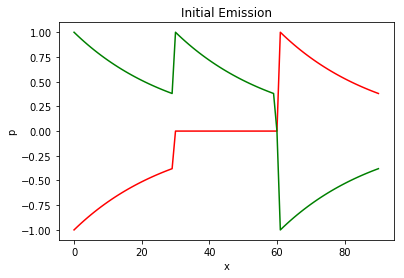

In [7]:
plt.figure()
plt.title("Initial Emission")
plt.xlabel("x")
plt.ylabel("p")
plt.plot(range(0, 91), estimator.emit_w_init_[0, 0, :], "-r")
plt.plot(range(0, 91), estimator.emit_w_init_[1, 0, :], "-g")
plt.show()

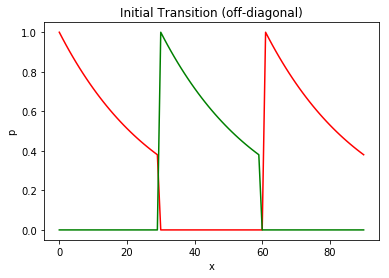

In [8]:
plt.figure()
plt.title("Initial Transition (off-diagonal)")
plt.xlabel("x")
plt.ylabel("p")
plt.plot(range(0, 91), estimator.trans_w_init_[0, 1, :], "-r")
plt.plot(range(0, 91), estimator.trans_w_init_[1, 0, :], "-g")
plt.show()

In [12]:
emit_w_final = output[-1]['emit_w']
trans_w_final = output[-1]['trans_w']

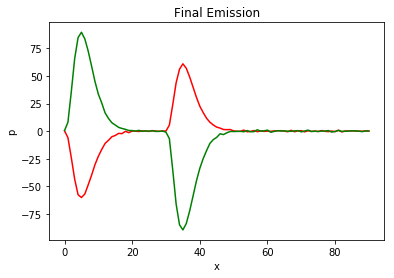

In [13]:
plt.figure()
plt.title("Final Emission")
plt.xlabel("x")
plt.ylabel("p")
plt.plot(range(0, 91), emit_w_final[0, 0, :], "-r")
plt.plot(range(0, 91), emit_w_final[1, 0, :], "-g")
plt.show()

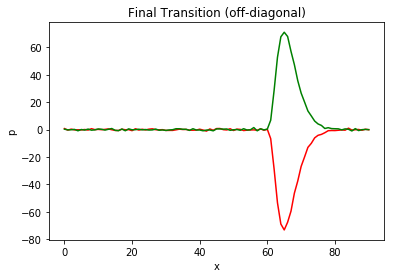

In [14]:
plt.figure()
plt.title("Final Transition (off-diagonal)")
plt.xlabel("x")
plt.ylabel("p")
plt.plot(range(0, 91), trans_w_final[0, 1, :], "-r")
plt.plot(range(0, 91), trans_w_final[1, 0, :], "-g")
plt.show()